## UNSUPERVISED LEARNING

In [59]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [60]:
iris = load_iris()
X = iris.data
y = iris.target

In [61]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [62]:
flower1 = X[0]

In [63]:
flower2 = X[1]

In [64]:
#Euclidian distance
distance = np.sqrt(sum((flower1-flower2)**2))
distance

0.5385164807134502

In [65]:
flower3 = X[2]
flower3

array([4.7, 3.2, 1.3, 0.2])

In [66]:
distance = np.sqrt(sum((flower1-flower3)**2))
distance


0.509901951359278

In [67]:
flower4 = X[3]

In [68]:
distance = np.sqrt(sum((flower1-flower4)**2))
distance


0.648074069840786

# SILHOUETTE SCORE ( MAIN QUALITY METRIC)

In [80]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [70]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [92]:
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X)
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [72]:
del silhouette_score

In [83]:
silhouette_score1 = silhouette_score(X, cluster_labels)

In [84]:
silhouette_score1

0.49764331793219224

In [75]:
# 0 - overlapping clusters 
# 1 - good clustering
# -1 - wrong clusterin


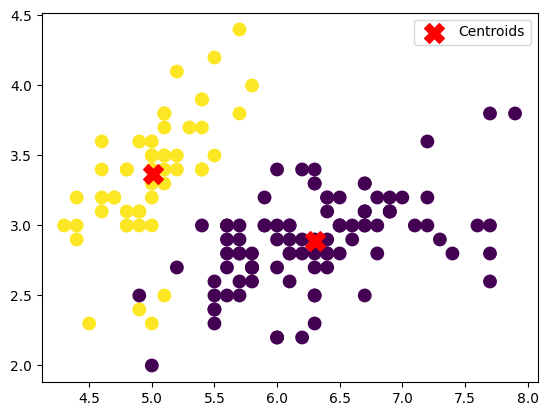

In [93]:
plt.scatter(X[:, 0], X[:, 1], c = cluster_labels, cmap = 'viridis', marker = 'o', s = 80)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], c = 'red', marker = 'X', s = 200, label = 'Centroids')
plt.legend()
plt.show()

In [77]:
from sklearn.metrics import davies_bouldin_score

In [78]:
dbi_score = davies_bouldin_score(X, cluster_labels)
dbi_score

0.7541404230958464

k = 2: score = 0.681
k = 3: score = 0.551
k = 4: score = 0.498
k = 5: score = 0.493
k = 6: score = 0.368
k = 7: score = 0.354


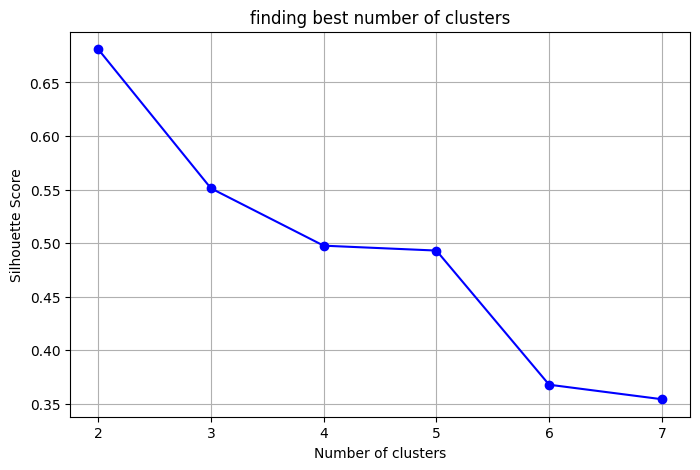

In [94]:
## HOW TO FIND THE OPTIMAL NUMBER OF CLUSTERS
scores = []
cluster_numbers = range(2, 8)

for k in cluster_numbers:
    kmeans = KMeans(n_clusters = k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X,cluster_labels)
    scores.append(score)
    print(f"k = {k}: score = {score:.3f}")
#plot the results 
plt.figure(figsize = (8,5))
plt.plot(cluster_numbers, scores, 'bo-')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("finding best number of clusters")
plt.grid(True)
plt.show()

In [95]:
from sklearn.cluster import AgglomerativeClustering

In [98]:
hierarchical = AgglomerativeClustering(n_clusters = 2)
hierarchical_labels = hierarchical.fit_predict(X)

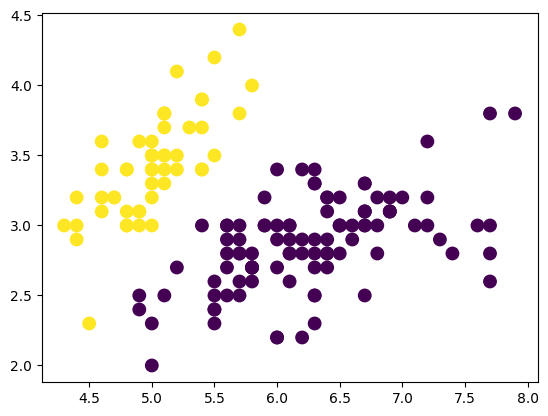

In [99]:
plt.scatter(X[:, 0], X[:, 1], c =hierarchical_labels, cmap = 'viridis', s = 80)
plt.show()

In [101]:
from scipy.cluster.hierarchy import dendrogram, linkage

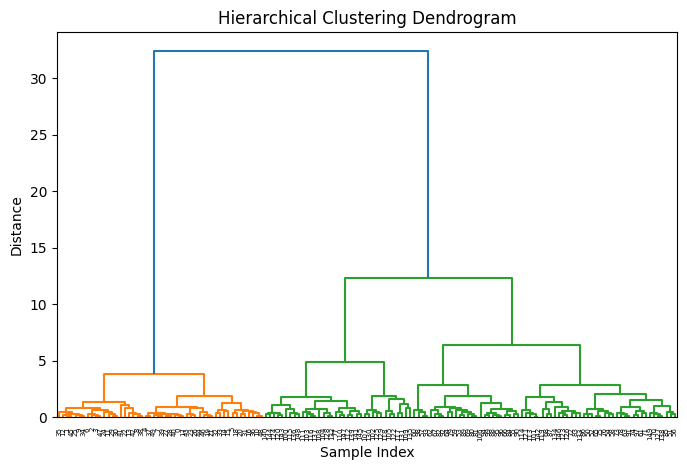

In [105]:
link_matrix = linkage(X, method = 'ward')
plt.figure(figsize = (8,5))
dendrogram(link_matrix, labels = np.arange(len(X)))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()